In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
df1 = pd.read_csv('table1_final.csv', index_col=[0])
df2 = pd.read_csv('table2_final.csv', index_col=[0])
df3 = pd.read_csv('table3_final1.csv', index_col=[0])
df4 = pd.read_csv('table4_final.csv')

In [3]:
df1['Amount'] = df1['Amount'].str.strip()
df2['Population'] = df2['Population'].str.strip()
df3['Estimated refugee stock at mid-year (both sexes)'] = df3['Estimated refugee stock at mid-year (both sexes)'].str.strip()

df1['Amount'] = df1['Amount'].str.replace(" ","")
df2['Population'] = df2['Population'].str.replace(" ","")
df3['Estimated refugee stock at mid-year (both sexes)'] = df3['Estimated refugee stock at mid-year (both sexes)'].str.replace(" ","")

df1['Amount'] = pd.to_numeric(df1['Amount'], errors='coerce').fillna(0).astype(np.int64).astype(np.int64)
df2['Population'] = pd.to_numeric(df2['Population'], errors='coerce').fillna(0).astype(np.int64).astype(np.int64)
df3['Estimated refugee stock at mid-year (both sexes)'] = pd.to_numeric(df3['Estimated refugee stock at mid-year (both sexes)'], errors='coerce', downcast="integer").fillna(0).astype(np.int64).astype(np.int64)

In [4]:
df2['Population'] = df2['Population'].apply(lambda x: x*1000)
df2

,Year,Gender,Population
Country code,,,
108,1990,both,5613000
174,1990,both,415000
262,1990,both,588000
232,1990,both,3139000
231,1990,both,48057000
...,...,...,...
882,2015,female,94000
772,2015,female,0
776,2015,female,53000


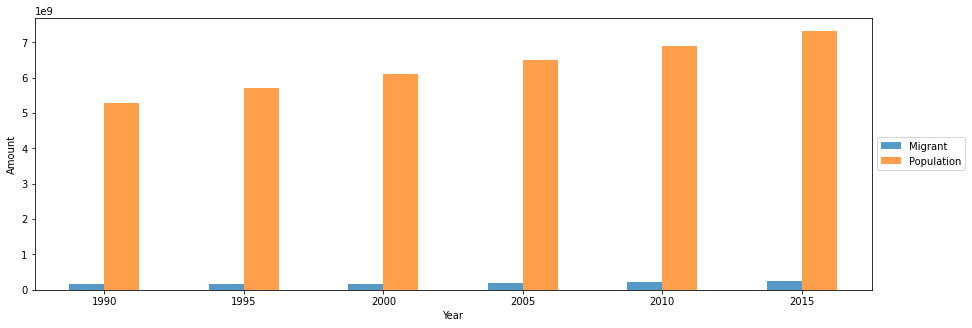

In [5]:
# migran vs total population worldwide, final chart 1
df1["Gender"].replace({'male)': 'male'}, inplace=True)
df2["Gender"].replace({'male)': 'male'}, inplace=True)

table1 = df1
table2 = df2

table1_2 = pd.merge(df1,df2,on=['Country code', 'Year', 'Gender'],how='left').drop(columns=['Annual rate change'])
table1_2 = table1_2.loc[(table1_2['Gender'] != 'female') & (table1_2['Gender'] != 'male') ]
table1_2.drop(columns = 'Gender')

graphic_1=table1_2.rename(columns={'Amount':'Migrant'}).groupby(['Year']).sum()

graphic_1.plot(kind='bar', figsize=(15, 5), alpha=0.75, rot=0, ylabel='Amount').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

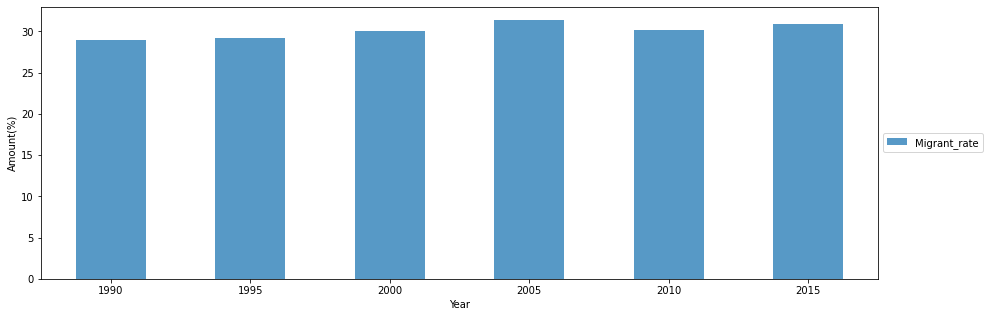

In [51]:
# migrant rate
table1_2_1 = table1_2.assign (
    Migrant_rate = lambda x: (x['Amount']/x['Population'])
).drop(columns = ['Amount','Population'])

graphic1_2_1=table1_2_1.groupby(['Year']).sum()

graphic1_2_1.plot(kind='bar', figsize=(15, 5), alpha=0.75, rot=0, ylabel='Amount(%)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

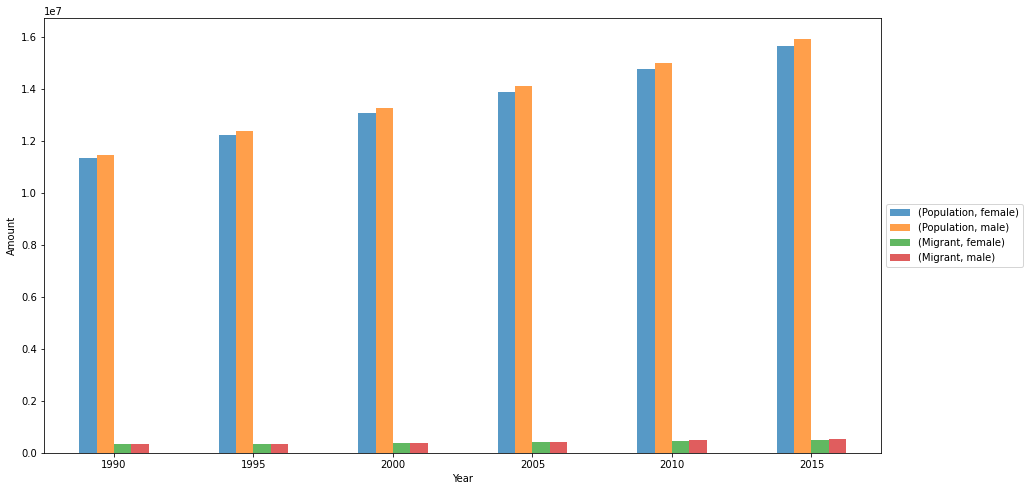

In [6]:
# migrant vs total population world, final chart 1-21 
table1_21 = pd.merge(df1,df2,on=['Country code', 'Year', 'Gender'],how='left').drop(columns=['Annual rate change'])
table1_21 = table1_21.loc[(table1_21['Gender'] == 'female') | (table1_21['Gender'] == 'male') ]

table1_21 = table1_21.rename(columns={'Amount':'Migrant'})
gender_population = pd.pivot_table(table1_21, index='Year', columns='Gender', values=[ 'Population'])
gender_migrant = pd.pivot_table(table1_21, index='Year', columns='Gender', values=['Migrant'])
population_migrant = pd.merge(gender_population,gender_migrant,on=['Year'],how='inner')

population_migrant.plot(kind='bar', figsize=(15, 8), alpha=0.75, rot=0, ylabel='Amount').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

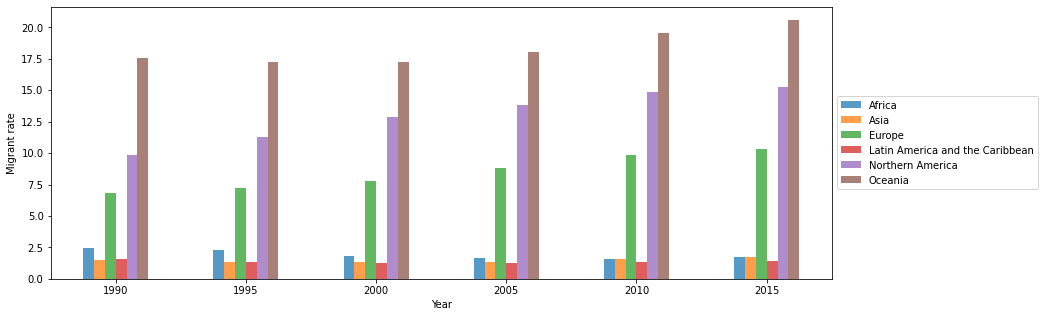

In [7]:
#migrant / population on major area, final chart 2
df4_reference = df4[['Country code','Major area' , 'Region', 'Developed region', 'Least developed country']]

table2 = pd.merge(df1,df2,on=['Country code', 'Year', 'Gender'],how='left')
table2 = pd.merge(table2,df4_reference,on=['Country code'],how='left').drop(columns=['Annual rate change'])

table2 = table2.loc[(table2['Gender'] != 'female') & (table2['Gender'] != 'male') ]
table2 = table2.drop(columns = ['Country code','Gender'])
table2 = table2.rename(columns={'Amount':'Migrant'}).groupby(['Year', 'Major area']).sum()

table2_1 = table2.assign (
    Migrant_rate = lambda x: (x['Migrant']/x['Population'])*100
).drop(columns = ['Migrant','Population'])

graphic2 = pd.pivot_table(table2_1, index='Year', columns='Major area', values='Migrant_rate')
graphic2.plot(kind='bar', figsize=(14, 5), alpha=0.75, rot=0, ylabel='Migrant rate').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

#highest 3: Oceania, Northern America, Europe, dive into these 3 areas region

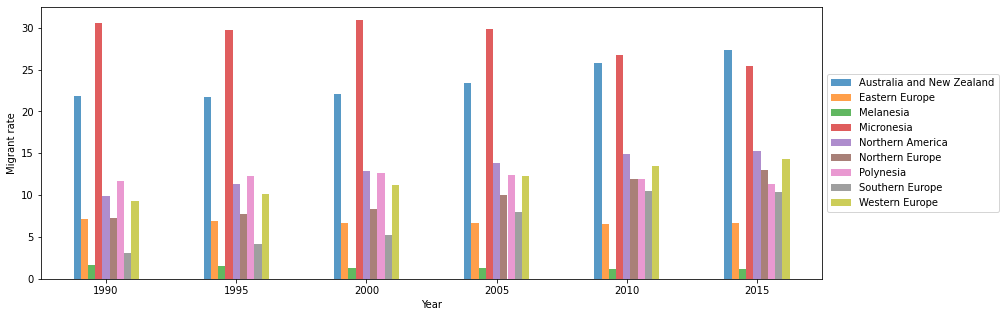

In [8]:
# migrant/ population, dive into Oceania, Northern America, Europe major area, final chart 2_1
table2_12 = pd.merge(df1,df2,on=['Country code', 'Year', 'Gender'],how='left')
table2_12 = pd.merge(table2_12,df4_reference,on=['Country code'],how='left').drop(columns=['Annual rate change'])

table2_12 = table2_12.loc[(table2_12['Major area'] == 'Oceania') | (table2_12['Major area'] == 'Northern America') | (table2_12['Major area'] == 'Europe')]
table2_12 = table2_12.rename(columns={'Amount':'Migrant'}).groupby(['Year', 'Region']).sum().drop(columns=['Country code'])

table2_12 = table2_12.assign (
    Migrant_rate = lambda x: (x['Migrant']/x['Population'])*100
).drop(columns = ['Migrant','Population'])

graphic2_12 = pd.pivot_table(table2_12, index='Year', columns='Region', values='Migrant_rate')
graphic2_12.plot(kind='bar', figsize=(14, 5), alpha=0.75, rot=0, ylabel='Migrant rate').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [9]:
# migrant/ refugee, total amount, final chart 3

In [12]:
df1_3 = df1.loc[(df1['Gender'] != 'female') & (df1['Gender'] != 'male') ].drop(columns=['Annual rate change'])

In [24]:
table3 = pd.merge(df1_3,df3,on=['Country code', 'Year'],how='left')
table3 = table3.rename(columns={'Estimated refugee stock at mid-year (both sexes)':'Refugee', 'Amount':'Migrant'})

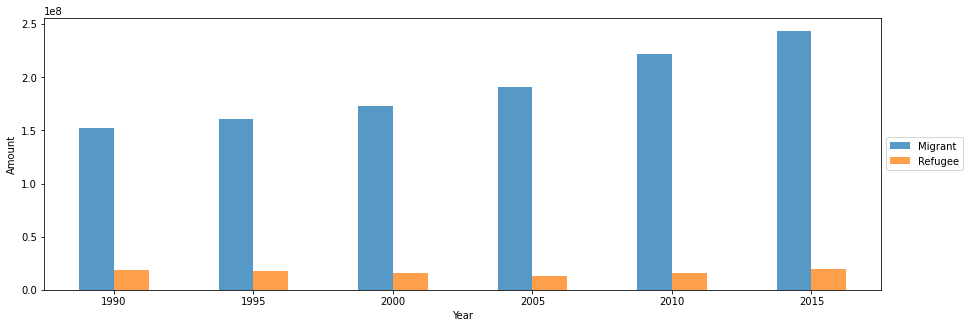

In [25]:
graphic_3=table3.groupby(['Year']).sum()

graphic_3.plot(kind='bar', figsize=(15, 5), alpha=0.75, rot=0, ylabel='Amount').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [35]:
# refugee/ population, total amount, final chart 4

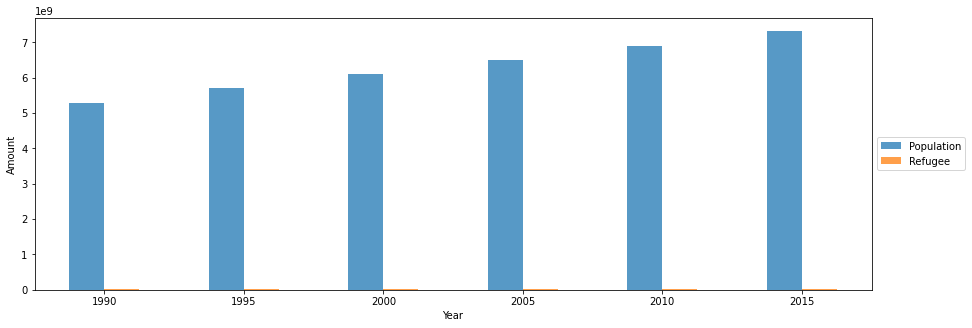

In [43]:
# migran vs total population worldwide, final chart 1

df2_4 = df2.loc[(df2['Gender'] != 'female') & (df2['Gender'] != 'male') ]

table4 = pd.merge(df2_4,df3,on=['Country code', 'Year'],how='left').rename(columns={'Estimated refugee stock at mid-year (both sexes)':'Refugee'}).drop(columns=['Gender'])

graphic4=table4.groupby(['Year']).sum()

graphic4.plot(kind='bar', figsize=(15, 5), alpha=0.75, rot=0, ylabel='Amount').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

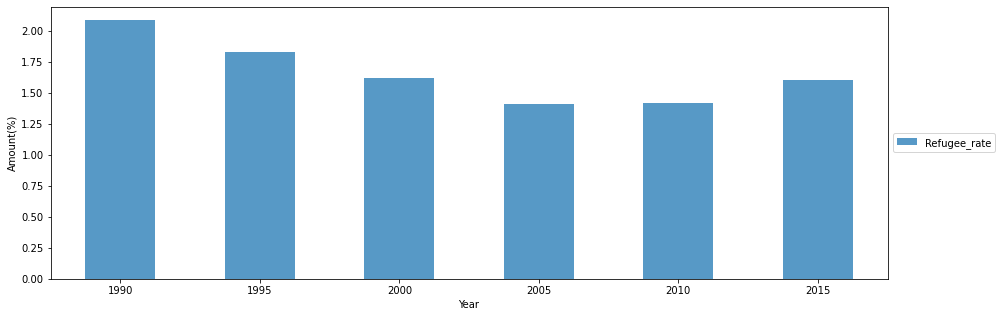

In [48]:
table4_1 = table4.assign (
    Refugee_rate = lambda x: (x['Refugee']/x['Population'])
).drop(columns = ['Refugee','Population'])

graphic4_1=table4_1.groupby(['Year']).sum()

graphic4_1.plot(kind='bar', figsize=(15, 5), alpha=0.75, rot=0, ylabel='Amount(%)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [52]:
#refugee rate on major area, final chart 4-2

In [56]:
df2_4 = df2.loc[(df2['Gender'] != 'female') & (df2['Gender'] != 'male') ]


table4_2 = pd.merge(df2_4,df3,on=['Country code', 'Year'],how='left').rename(columns={'Estimated refugee stock at mid-year (both sexes)':'Refugee'}).drop(columns=['Gender'])
table4_2 = pd.merge(table4_2,df4_reference,on=['Country code'],how='left')

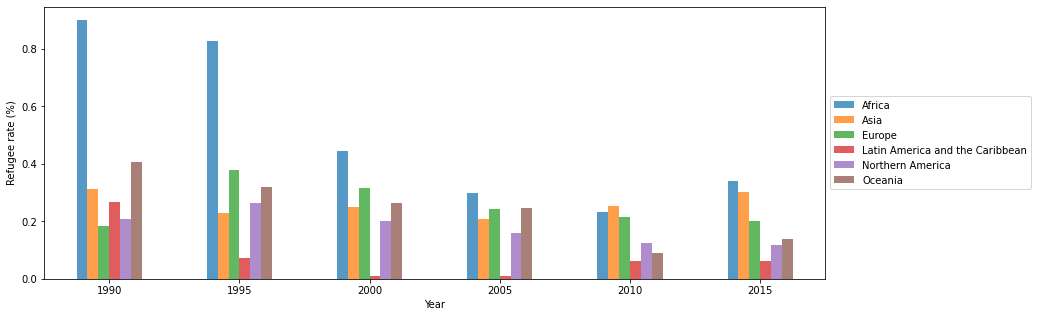

In [63]:
table4_2 = table4_2.groupby(['Year', 'Major area']).sum()

table4_21 = table4_2.assign (
    Refugee_rate = lambda x: (x['Refugee']/x['Population'])*100
).drop(columns = ['Refugee','Population'])

graphic4_21 = pd.pivot_table(table4_21, index='Year', columns='Major area', values='Refugee_rate')
graphic4_21.plot(kind='bar', figsize=(14, 5), alpha=0.75, rot=0, ylabel='Refugee rate (%)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

#highest 3: Africa, Oceania, Asia, dive into these 3 areas region

In [64]:
#refugee rate on region, final chart 4-3

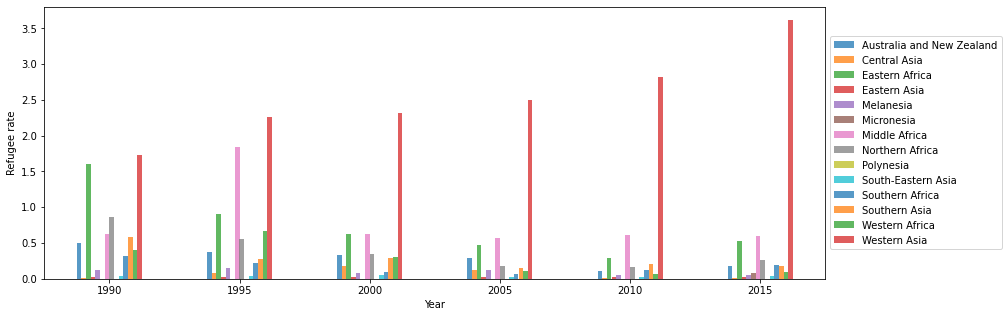

In [84]:
table4_31 = pd.merge(df2_4,df3,on=['Country code', 'Year'],how='left').rename(columns={'Estimated refugee stock at mid-year (both sexes)':'Refugee'}).drop(columns=['Gender'])
table4_31 = pd.merge(table4_31,df4_reference,on=['Country code'],how='left')

table4_31 = table4_31.loc[(table4_31['Major area'] == 'Africa') | (table4_31['Major area'] == 'Oceania') | (table4_31['Major area'] == 'Asia')]
table4_31 = table4_31.groupby(['Year', 'Region']).sum().drop(columns=['Country code'])

table4_32 = table4_31.assign (
    Refugee_rate = lambda x: (x['Refugee']/x['Population'])*100
).drop(columns = ['Refugee','Population'])

graphic4_32 = pd.pivot_table(table4_32, index='Year', columns='Region', values='Refugee_rate')
graphic4_32.plot(kind='bar', figsize=(14, 5), alpha=0.75, rot=0, ylabel='Refugee rate').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))